In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from sklearn import tree
#from sklearn.model_selection import train_test_split version 0.19
import sklearn.cross_validation as cv
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sklearn.datasets as datasets
import pandas as pd


In [62]:
file = 'Tennis.csv'
df = pd.read_csv(file)

#df

In [22]:
df[df['outlook']=='sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [23]:
df[df['outlook']=='overcast'] # llego a 

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


In [24]:
df[df['outlook']=='rainy']#.sort_values(by='play')

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


0.714285714286
[7 4 2 1 1 2 3]
[[1 1]
 [1 4]]


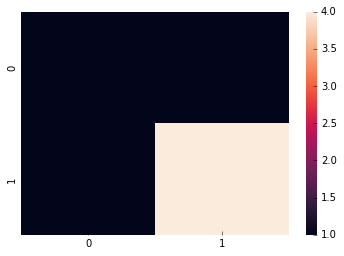

In [64]:
for col in df.columns:
    df[col] = pd.Categorical(df[col] ).codes


X= df[['outlook', 'temp', 'humidity', 'windy']]
y=df[['play']]


X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.5, random_state=42)


clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))


predictions = clf.predict(X_test)


print(clf.tree_.n_node_samples)

print(confusion_matrix(predictions,y_test))


sns.heatmap(confusion_matrix(predictions,y_test))
#tree.DecisionTreeClassifier? # help para hallar la descripcion del clasificador y las distintas opciones.

#Árbol de decision en dataset IRIS

In [68]:


iris = datasets.load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [69]:

X_train, X_test, y_train, y_test = cv.train_test_split(df[iris.feature_names], iris.target, test_size=0.5, stratify=iris.target, random_state=123456)


dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [71]:
# PENDIENTE: EVALUAR EL CLASIFICADOR.

#EJEMPLO RANDOM FOREST

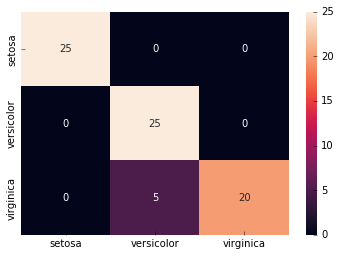

In [72]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)



cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

In [73]:
rf = RandomForestClassifier(n_estimators=3, bootstrap=True, random_state=123456)
rf.fit(X_train, y_train)

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
accuracy

0.93333333333333335